<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Variables-numericas" data-toc-modified-id="Variables-numericas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variables numericas</a></span></li><li><span><a href="#Variables-categoricas" data-toc-modified-id="Variables-categoricas-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables categoricas</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_pickle("../Datos/df.pickle")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168288 entries, 0 to 1178176
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   salida_date             1168288 non-null  datetime64[ns]
 1   llegada_date            1168288 non-null  datetime64[ns]
 2   year                    1168288 non-null  int64         
 3   day_of_month            1168288 non-null  int64         
 4   day_of_week             1168288 non-null  int64         
 5   origin_airport_id       1168288 non-null  int64         
 6   dest_airport_id         1168288 non-null  int64         
 7   op_carrier_fl_num       1168288 non-null  int64         
 8   tail_num                1168288 non-null  object        
 9   op_carrier              1168288 non-null  object        
 10  dep_del15               1168288 non-null  float64       
 11  arr_del15               1168288 non-null  float64       
 12  cancelled     

# EDA

## Variables numericas

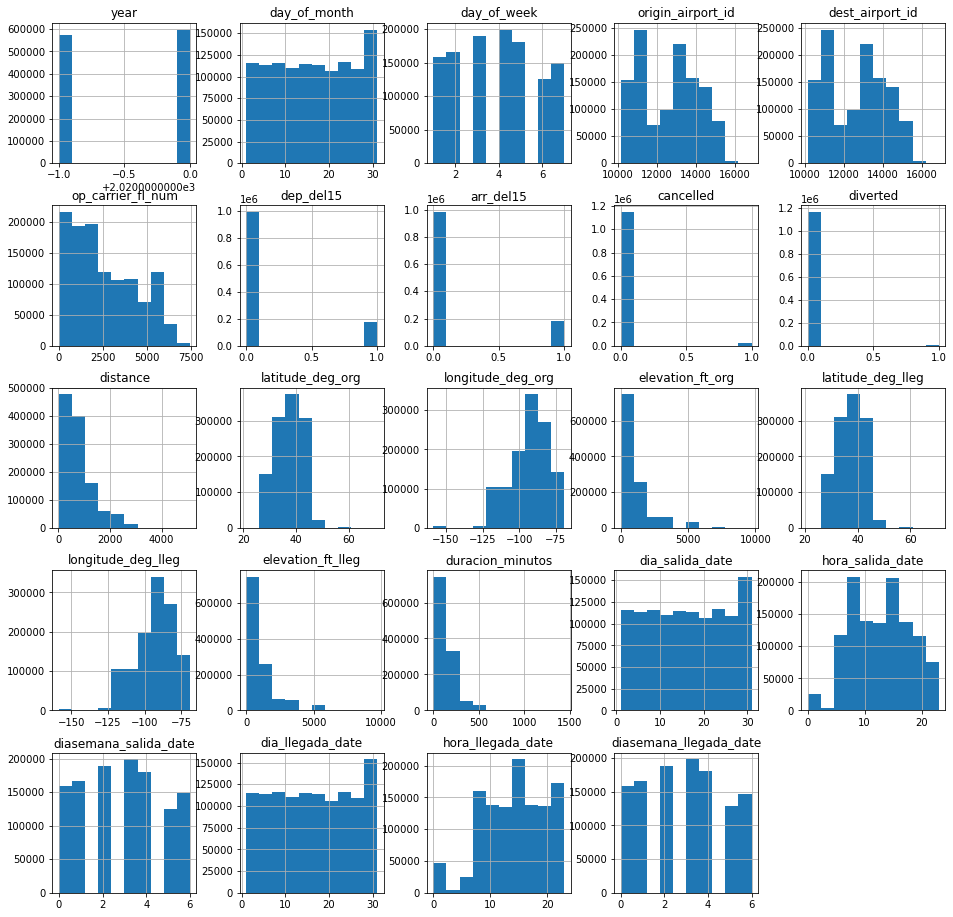

In [6]:
df.select_dtypes('number').hist(figsize=(16,16))
plt.show()

- Obervaciones:
    - en distintos años igual numero de vuelos
    - en los aeropuertos llegadas y salidas parecen iguales, tiene sentido


Cosas a mirar:
- duracion minutos: valores altos
- elevaciones: valores altos
- distancias: altos
- a final de mes un incremento numero de vuelos (sera vacaciones??



**P1** Hay algun cancelado y diverted?

In [7]:
pd.crosstab(df.diverted, df.cancelled)

cancelled,0.0,1.0
diverted,,
0.0,1145733,20129
1.0,2426,0


No hay ninguno **cancelado** y **diverted**

In [8]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
year,1168288.0,2019.510849,0.499882,2019.000000,2019.000000,2020.000000,2020.000000,2020.000000
day_of_month,1168288.0,15.970265,8.986618,1.000000,8.000000,16.000000,24.000000,31.000000
day_of_week,1168288.0,3.897374,1.916685,1.000000,2.000000,4.000000,5.000000,7.000000
origin_airport_id,1168288.0,12664.295117,1527.881207,10135.000000,11292.000000,12889.000000,14027.000000,16869.000000
dest_airport_id,1168288.0,12664.181918,1527.781228,10135.000000,11292.000000,12889.000000,14027.000000,16869.000000
op_carrier_fl_num,1168288.0,2591.286039,1822.043266,1.000000,1041.000000,2152.000000,4018.000000,7439.000000
dep_del15,1168288.0,0.152156,0.359172,0.000000,0.000000,0.000000,0.000000,1.000000
arr_del15,1168288.0,0.158411,0.365126,0.000000,0.000000,0.000000,0.000000,1.000000
cancelled,1168288.0,0.017229,0.130125,0.000000,0.000000,0.000000,0.000000,1.000000
diverted,1168288.0,0.002077,0.045522,0.000000,0.000000,0.000000,0.000000,1.000000


- elevacion: datos a mas de 9000 pies?
- distancia: 5000 ??
- duracion: 1400 minutos??


## Variables categoricas

In [9]:
df.select_dtypes(exclude='number').nunique()

salida_date           75729
llegada_date          80569
tail_num               5857
op_carrier               17
type_org                  5
name_org                352
iso_country_org           1
iso_region_org           44
type_lleg                 5
name_lleg               352
iso_country_lleg          1
iso_region_lleg          44
fecha_salida_date        62
fecha_llegada_date       64
dtype: int64

In [10]:
# Todos son vuelos que van y llegan a USA
df.drop(columns=['iso_country_org','iso_country_lleg' ],inplace=True)

In [11]:
var_cat = df.select_dtypes(exclude='number').columns.tolist()


In [12]:
from math import ceil
n = ceil(len(var_cat2)/2)

f, ax = plt.subplots(n,2, figsize = (16,n*8)) 
ax = ax.flat 

for i, variable in enumerate(var_cat2):
# f, ax = plt.subplots(n,2, figsize = (12,4))
    df[variable].value_counts(ascending=True).plot.barh(ax=ax[i])
    ax[i].set_title(variable)
    

NameError: name 'var_cat2' is not defined

In [13]:
cat = df.select_dtypes(exclude='number').reset_index()
columns_cat = cat.columns[cat.nunique()<20]
cat.loc[:,columns_cat].apply(lambda x: x.value_counts(normalize=True) ).T.stack()\
        .to_frame().reset_index().rename(columns={'level_0':'variable','level_1':'value',0:'frecuencia'})\
        .sort_values(by = ['variable','frecuencia'])

,variable,value,frecuencia
8,op_carrier,HA,0.011820
7,op_carrier,G4,0.012363
6,op_carrier,F9,0.018691
5,op_carrier,EV,0.020216
10,op_carrier,NK,0.027989
15,op_carrier,YV,0.030528
2,op_carrier,AS,0.035825
0,op_carrier,9E,0.037034
11,op_carrier,OH,0.040420
3,op_carrier,B6,0.041966


- La mayoria de aerolineas tienen un numero parecido de vuelos
- type: son hay bastantes heliopuertos, y no hay grandes aeropuertos